In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
COLORMAP = 'gist_rainbow'
DEFAULT_M = 2**32
DEFAULT_A = 1103515245
DEFAULT_C = 12345
SAMPLES_AMOUNT = 50000
QUARTER_OF_PI = np.pi / 4

In [3]:
def lcg(m=DEFAULT_M, a=DEFAULT_A, c=DEFAULT_C):
    lcg.current = (a * lcg.current + c) % m
    return lcg.current / m

def apply_colormap(bins, patches):
    cm = plt.cm.get_cmap(COLORMAP)
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    col = bin_centers - min(bin_centers)
    col /= max(col)

    for c, p in zip(col, patches):
        plt.setp(p, 'facecolor', cm(c))

def plot_graph(sequence):
    plt.rcParams["figure.figsize"] = (20, 10)
    n, bins, patches = plt.hist(sequence, bins=20)
    plt.xticks(np.arange(0, 1.05, 0.05))
    #plt.axhline(y=2500, color='r', linestyle='-')
    apply_colormap(bins, patches)
    
    plt.show()
    
def get_math_values(sequence):
    array = np.array(sequence)
    
    mean = array.mean()
    dispersion = array.var()
    sig = array.std()
    
    print(f"Мат. ожидание: {mean}")
    print(f"Дисперсия: {dispersion}")
    print(f"Средняя квадратическая: {sig}")
    
def get_circumstantial_evidence(sequence):
    k_pairs = [(sequence[i], sequence[i + 1]) for i in range(0, len(sequence), 2)]
    k_list = list(filter(lambda pair: pow(pair[0], 2) + pow(pair[1], 2) < 1, k_pairs))
    k = len(k_list)
    
    print(f"Проверка по косвенному призанку: {2 * k / SAMPLES_AMOUNT} -> {QUARTER_OF_PI}")

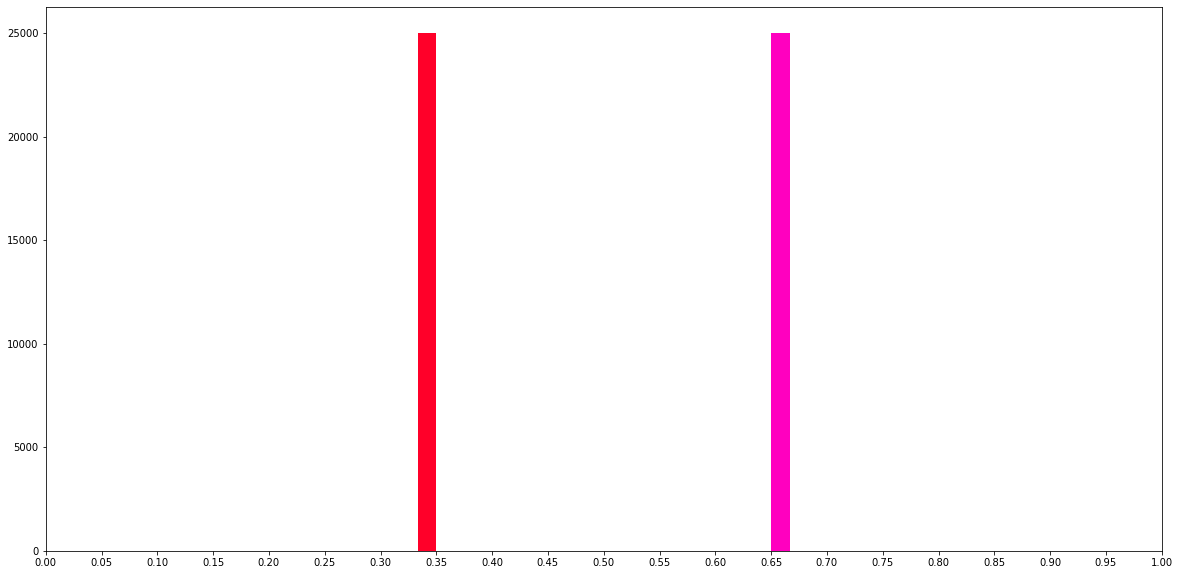

Мат. ожидание: 0.49999999999999994
Дисперсия: 0.027777777777777787
Средняя квадратическая: 0.16666666666666669


In [7]:
lcg.current = 1

sequence = [lcg(3, 5) for i in range(SAMPLES_AMOUNT)]

plot_graph(sequence)
get_math_values(sequence)

In [5]:
get_circumstantial_evidence(sequence)

Проверка по косвенному призанку: 0.78544 -> 0.7853981633974483


In [10]:
def getPeriod(sequence):
    xv = sequence[0]
    lst = []
    for i in range(len(sequence)):
        if sequence[i] == xv:
            if len(lst) >= 2:
                break
            lst.append(i)
    p = lst[1] - lst[0]
    return p

print(getPeriod(sequence))

2
